# PRÁCTICA 4 - SIMULACIÓN DE ESTRATEGIAS DE VACUNACIÓN

### Se quiere reducir la transmisión de una enfermedad mediante vacunación. Suponer que cuando un individuo se vacuna, se impide cualquier contagio a través de sus relaciones directas. Así, definimos el número de relaciones inmunizadas del nodo i como el número de vecinos de i

### Suponer que se dispone de una sola vacuna, con la que se pretende maximizar el número de relaciones inmunizadas

In [1]:
import networkx as nx
import numpy as np
G = nx.Graph()
G.clear()
G.add_nodes_from(range(1,10))
list(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(1,6),(2,3),(2,8),(2,9),(3,7)])

In [3]:
list(G.edges())

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 8), (2, 9), (3, 7)]

### Visualización de la red

In [4]:
%matplotlib inline

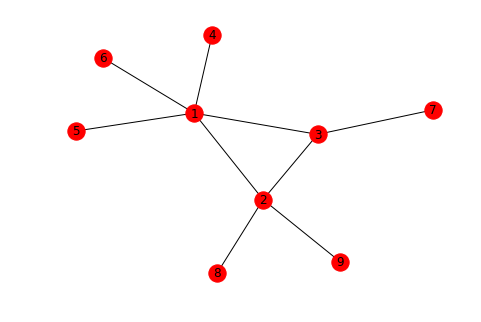

In [5]:
#pos=nx.layout.kamada_kawai_layout(G)
nx.draw(G,with_labels=True)

### Suponer que se dispone de una sola vacuna, con la que se pretende maximizar el número de relaciones inmunizadas
### Si se conoce a priori la red de contactos ¿a qué persona escogería? ¿por qué?

#### Escogería a la persona correspondiente al nodo con mayor grado, así maximizamos el número de relaciones inmunizadas.

### Suponer que desconoce la red de contactos. Sigue una estrategia de vacunación que llama aleatoria y que consiste en escoger un individuo al azar y vacunarlo. Programe un pequeño script en python que simule esta estrategia un número de T veces en la red de contactos propuesta y calcule el número de relaciones inmunizadas esperado

In [6]:
import random

In [19]:
T = 1
inmunizados = 0
while T < 6:
    # Elijo aleatoriamente un individuo para vacunar
    individuoVacunado = random.randint(1, 9)
    # Incremento los individuos inmunizados
    inmunizados += G.degree(individuoVacunado)
    # Incremento el número de veces (T)
    T = T + 1
    
media = inmunizados / T
print ('Media de Inmunizados: ', media)

Media de Inmunizados:  2.1666666666666665


### Suponer que al igual que antes desconoce la red de contactos. Ahora sigue una estrategia de vacunación que llama aleatoria indirecta y que consiste en escoger a un individuo al azar y después vacunar a uno de sus vecinos también escogido aleatoriamente. Programe un pequeño script en python que simule esta estrategia un número de T veces en la red de contactos propuesta y calcule el número de relaciones inmunizadas esperado

In [21]:
T = 1
suma = 0
while T < 6:
    print('PRUEBA:',T)
    individuoElegido = random.randint(1, 9)
    print('Individuo Elegido: ',individuoElegido)
    lista = list(G.neighbors(individuoElegido))
    vecinoInmunizado = random.choice(lista)
    print('Vecino Inmunizado: ',vecinoInmunizado)
    
    lista2 = list(G.neighbors(vecinoInmunizado))
    print('Individuos Inmunizados:',lista2)
    print('Número de Inmunizados:',len(lista2))
    print()
    suma = suma + len(lista2)
    T = T + 1
    
media = suma / T
print ('Media de Inmunizados: ', media)

PRUEBA: 1
Individuo Elegido:  6
Vecino Inmunizado:  1
Individuos Inmunizados: [2, 3, 4, 5, 6]
Número de Inmunizados: 5

PRUEBA: 2
Individuo Elegido:  4
Vecino Inmunizado:  1
Individuos Inmunizados: [2, 3, 4, 5, 6]
Número de Inmunizados: 5

PRUEBA: 3
Individuo Elegido:  7
Vecino Inmunizado:  3
Individuos Inmunizados: [1, 2, 7]
Número de Inmunizados: 3

PRUEBA: 4
Individuo Elegido:  1
Vecino Inmunizado:  2
Individuos Inmunizados: [1, 3, 8, 9]
Número de Inmunizados: 4

PRUEBA: 5
Individuo Elegido:  6
Vecino Inmunizado:  1
Individuos Inmunizados: [2, 3, 4, 5, 6]
Número de Inmunizados: 5

Media de Inmunizados:  3.6666666666666665


### ¿Cuál de las dos estrategias te parece mejor? ¿Por qué?

#### Según los resultados obtenidos, con la estrategia de vacunación indirecta se obtienen más inmunizados con el mismo número de veces

### Implemente una función en python que dada una red (por ejemplo la red de contactos propuesta inicialmente) calcule el valor exacto del número de relaciones inmunizadas esperadas para la vacunación aleatoria. Piense en la relación que existe entre la distribución del grado de los nodos y su valor medio con el número de relaciones inmunizadas esperado de la estrategia de vacunación aleatoria. Compare este valor con el obtenido mediante simulación.

In [23]:
def inmunizadosAleatorios():
    individuoVacunado = random.randint(1, 9)
    print('Individuo Vacunado: ',individuoVacunado)
    lista = list(G.neighbors(individuoVacunado))
    print('Individuos Inmunizados:',lista)
    print('Número de Inmunizados:',len(lista))
    print()

In [26]:
inmunizadosAleatorios()

Individuo Vacunado:  2
Individuos Inmunizados: [1, 3, 8, 9]
Número de Inmunizados: 4



### Implemente una función en python que dada una red (por ejemplo la red de contactos propuesta inicialmente) calcule el valor exacto del número de relaciones inmunizadas esperadas para la vacunación aleatoria indirecta. Compare este valor con el obtenido mediante simulación.

In [27]:
def inmunizadosAlestoriosIndirectos():
    individuoElegido = random.randint(1, 9)
    print('Individuo Elegido: ',individuoElegido)
    lista = list(G.neighbors(individuoElegido))
    vecinoInmunizado = random.choice(lista)
    print('Vecino Inmunizado: ',vecinoInmunizado)
    
    lista2 = list(G.neighbors(vecinoInmunizado))
    print('Individuos Inmunizados:',lista2)
    print('Número de Inmunizados:',len(lista2))
    print()

In [28]:
inmunizadosAlestoriosIndirectos()

Individuo Elegido:  4
Vecino Inmunizado:  1
Individuos Inmunizados: [2, 3, 4, 5, 6]
Número de Inmunizados: 5

